# Augementation

https://github.com/makcedward/nlpaug

https://nlpaug.readthedocs.io/en/latest/overview/overview.html

## Import Libraries

In [1]:
import os
os.environ["MODEL_DIR"] = '../model'

In [2]:
# from nlpaug.util.file.download import DownloadUtil
# DownloadUtil.download_word2vec(dest_dir='.') # Download word2vec model
# DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') # Download GloVe model
# DownloadUtil.download_fasttext(model_name='wiki-news-300d-1M', dest_dir='.') # Download fasttext model

In [2]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
import nltk

In [3]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andrewcarver/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/andrewcarver/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
text = 'The quick brown fox jumps over the lazy dog .'
print(text)

The quick brown fox jumps over the lazy dog .


## Character Augmentation

### OCR Augmenter
Substitute character by pre-defined OCR error

In [24]:
aug = nac.OcrAug()
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Texts:
['The quick 6rown fox jumps over the 1azy dog .', 'The quick brown fox jomps over the la2y dog .', 'The qoick brown fox jomps over the lazy dog .']


### Keyboard Augmenter
Substitute character by keyboard distance

In [25]:
aug = nac.KeyboardAug()
augmented_text = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
['The qhick brown fox numps over the lazy dog .', 'The quick brown fox jumps *ver the lazy dog .', 'The quick br*wn fox jumps oFer the lazy dog .']


### Random Augmenter
Insert character randomly

In [26]:
aug = nac.RandomCharAug(action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick b4rown fox jumps over the lazy dog .


Substitute character randomly

In [27]:
aug = nac.RandomCharAug(action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quicR bGown fox jumpp over the lazy dog .


Swap Character Randomly

In [28]:
aug = nac.RandomCharAug(action="swap")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The qiuck brown fox jumps over the lazy dog .


Delete Character randomly

In [29]:
aug = nac.RandomCharAug(action="delete")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick rown fox jumps ovr the lazy dog .


## Word Augmenter
Besides character augmentation, word level is important as well. We make use of word2vec (Mikolov et al., 2013), GloVe (Pennington et al., 2014), fasttext (Joulin et al., 2016), BERT(Devlin et al., 2018) and wordnet to insert and substitute similar word. Word2vecAug, GloVeAug and FasttextAug use word embeddings to find most similar group of words to replace original word. On the other hand, BertAug use language models to predict possible target word. WordNetAug use statistics way to find the similar group of words.

### TFIDF Augmentation

In [2]:
import nlpaug.augmenter.word as naw

In [15]:
# aug = naw.TfIdfAug(model_path='.')

### Spelling Augmenter
Substitute word by spelling mistake words dictionary

In [10]:
# aug = naw.SpellingAug(os.environ["MODEL_DIR"] + 'spelling_en.txt')
# augmented_texts = aug.augment(text, n=3)
# print("Original:")
# print(text)
# print("Augmented Texts:")
# print(augmented_texts)

In [11]:
import nlpaug.augmenter.word as naw
aug = naw.SpellingAug(dict_path='./spelling_en.txt')

In [13]:
augmented_data = aug.augment(text)

In [14]:
augmented_data

'The quick brown fox jumps other tnhe lizy dog .'

### Synonym Augmentation

In [17]:
aug = naw.SynonymAug()

In [19]:
augmented_data = aug.augment(text)

In [20]:
augmented_data

'The quick brownness charles james fox jumps over the work shy dog .'

### Split Augmentation

In [21]:
import nlpaug.augmenter.word as naw
aug = naw.SplitAug()

In [22]:
augmented_data = aug.augment(text)
augmented_data

'The qui ck brown fox j umps ov er the lazy dog .'

### Context Word Embedding

In [3]:
import nlpaug.augmenter.word as naw
aug = naw.ContextualWordEmbsAug()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMaskedLM were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
augmented_data = aug.augment(text)
augmented_data

../torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


'a quick brown bear jumps at the lazy dog .'

## Importing The Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Get existing augmented data

In [5]:
intent_df = pd.read_csv('data/reviewed_conversations/reviewed_conversation_18-Aug-2020(20-48-42).csv', encoding='utf-8-sig')

In [6]:
print(intent_df.head())

                            text           intent
0  this is my first conversation            hru.q
1                       ya ya ya        hobbies.q
2                    hello hello         greeting
3               how is your day?            hru.q
4         let's keep this simple  encouragement.s


In [7]:
intent_df = intent_df[pd.notnull(intent_df['intent'])]

In [8]:
len(intent_df)

6

In [9]:
intent_df.intent.unique()

array(['hru.q', 'hobbies.q', 'greeting', 'encouragement.s'], dtype=object)

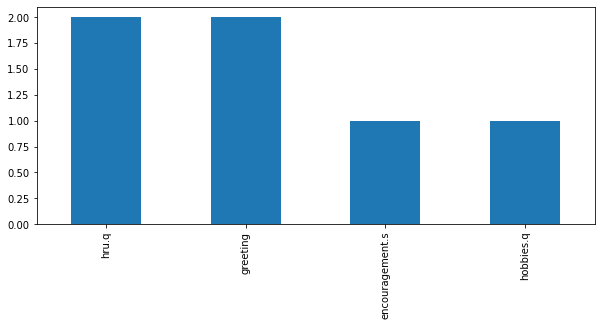

In [10]:
my_tags = ['greeting', 'drink_opinion.q', 'what_job.q', 'job_opinions.q',
       'what_goals.q', 'encouragement.s', 'hru.q', 'hobbies.q',
       'identity.q', 'where_from.q', 'well_wish.s', 'weather.q',
       'sports.q', 'movies.q', 'music.q', 'family.q', 'travel.q']
plt.figure(figsize=(10,4))
intent_df.intent.value_counts().plot(kind='bar');

## Augment The Dataset

### OCR Augmentation

In [11]:
ocr = nac.OcrAug()

In [12]:
ocr_list = []

In [13]:
for x in intent_df.iterrows():
    ocr_list.append(
        {
            'text': ocr.augment(x[1][0]),
            'intent': x[1][1]
        }
    )

In [14]:
ocr_aug_df = pd.DataFrame(ocr_list)

In [15]:
ocr_aug_df.head()

,text,intent
0,this is my first c0nvek8ation,hru.q
1,ya ya ya,hobbies.q
2,hello he1lo,greeting
3,how i8 your day ?,hru.q
4,1et ' s keep this simple,encouragement.s


In [16]:
# combined_df = pd.concat([intent_df, augmented_df])

### Keyboard Augmentation

In [17]:
keyboard_aug = nac.KeyboardAug()
keyboard_list = []

In [18]:
for x in intent_df.iterrows():
    keyboard_list.append(
        {
            'text': keyboard_aug.augment(x[1][0]),
            'intent': x[1][1]
        }
    )

In [19]:
keyboard_aug_df = pd.DataFrame(keyboard_list)
keyboard_aug_df.head()

,text,intent
0,this is my first coGversa6lon,hru.q
1,ya ya ya,hobbies.q
2,hello heilo,greeting
3,how is your day ?,hru.q
4,let ' s keep this simple,encouragement.s


### Random Augmenter

Insert Random Character

In [20]:
rand_insert = nac.RandomCharAug(action="insert")
rand_insert_list = []

In [21]:
for x in intent_df.iterrows():
    rand_insert_list.append(
        {
            'text': rand_insert.augment(x[1][0]),
            'intent': x[1][1]
        
        }
    )

In [22]:
rand_insert_df = pd.DataFrame(rand_insert_list)
rand_insert_df.head()

,text,intent
0,this is my firgst conversation,hru.q
1,ya ya ya,hobbies.q
2,Whello hello,greeting
3,how is your day ?,hru.q
4,let ' s keep this simple,encouragement.s


Random substitute

In [23]:
rand_sub = nac.RandomCharAug(action="substitute")
rand_sub_list = []

In [24]:
for x in intent_df.iterrows():
    rand_sub_list.append(
        {
            'text': rand_sub.augment(x[1][0]),
            'intent': x[1][1]
        }
    )

In [25]:
rand_sub_df = pd.DataFrame(rand_sub_list)
rand_sub_df.head()

,text,intent
0,this is my fi@st conversation,hru.q
1,ya ya ya,hobbies.q
2,hello h4llo,greeting
3,how is your day ?,hru.q
4,let ' s keed this simple,encouragement.s


Random Swap

In [26]:
rand_swap = nac.RandomCharAug(action="swap")
rand_swap_list = []

In [27]:
for x in intent_df.iterrows():
    rand_swap_list.append(
        {
            'text': rand_swap.augment(x[1][0]),
            'intent': x[1][1]
        
        }
    )

In [28]:
rand_swap_df = pd.DataFrame(rand_swap_list)
rand_swap_df.head()

,text,intent
0,this is my first ocvnesration,hru.q
1,ya ya ya,hobbies.q
2,helol hello,greeting
3,how is oyur day ?,hru.q
4,let ' s keep this simple,encouragement.s


Random Delete

In [29]:
rand_del = nac.RandomCharAug(action="delete")
rand_del_list = []

In [30]:
for x in intent_df.iterrows():
    rand_del_list.append(
        {
            'text': rand_del.augment(x[1][0]),
            'intent': x[1][1]
        
        }
    )

In [31]:
rand_del_df = pd.DataFrame(rand_del_list)
rand_del_df.head()

,text,intent
0,this is my first coveraton,hru.q
1,ya ya ya,hobbies.q
2,hello hell,greeting
3,how is your day ?,hru.q
4,let ' s keep this simple,encouragement.s


### Spelling Augmenter

In [32]:
#import nlpaug.augmenter.word as naw
spell_aug = naw.SpellingAug(dict_path='data/original_data/spelling_en.txt')
spell_aug_list = []

In [33]:
for x in intent_df.iterrows():
    spell_aug_list.append(
        {
            'text': spell_aug.augment(x[1][0]),
            'intent': x[1][1]
        
        }
    )

In [34]:
spell_aug_df = pd.DataFrame(spell_aug_list)
spell_aug_df.head()

,text,intent
0,this is my first convastion,hru.q
1,you ya ya,hobbies.q
2,hello yellow,greeting
3,how is your bay ?,hru.q
4,let ' s keep tis simple,encouragement.s


### Synonym Augmentation

In [35]:
syn_aug = naw.SynonymAug()
syn_aug_list = []

In [36]:
for x in intent_df.iterrows():
    syn_aug_list.append(
        {
            'text': syn_aug.augment(x[1][0]),
            'intent': x[1][1]
        
        }
    )

In [37]:
syn_aug_df = pd.DataFrame(syn_aug_list)
syn_aug_df.head()

,text,intent
0,this is my initiatory conversation,hru.q
1,ya ya ya,hobbies.q
2,hello how do you do,greeting
3,how is your twenty four hours ?,hru.q
4,let ' s preserve this simple,encouragement.s


### Split Augmentation

In [38]:
import nlpaug.augmenter.word as naw
split_aug = naw.SplitAug()
split_aug_list = []

In [39]:
for x in intent_df.iterrows():
    split_aug_list.append(
        {
            'text': split_aug.augment(x[1][0]),
            'intent': x[1][1]
        
        }
    )

In [40]:
split_aug_df = pd.DataFrame(split_aug_list)
split_aug_df.head()

,text,intent
0,this is my first convers ation,hru.q
1,ya ya ya,hobbies.q
2,hello he llo,greeting
3,how is yo ur day ?,hru.q
4,let ' s keep this s imple,encouragement.s


### Context Word Embedding

In [53]:
# import nlpaug.augmenter.word as naw
# cwe_aug = naw.ContextualWordEmbsAug()
# cwe_aug_list = []

In [42]:
# for x in intent_df.iterrows():
#     cwe_aug_list.append(
#         {
#             'text': cwe_aug.augment(x[1][0]),
#             'intent': x[1][1]
        
#         }
#     )

../torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [43]:
# cwe_aug_df = pd.DataFrame(cwe_aug_list)
# cwe_aug_df.head()

,text,intent
0,.,greeting
1,.,greeting
2,.,greeting
3,.,greeting
4,.,greeting


## Concatenating DFs

In [41]:
combined_df = pd.concat([intent_df, ocr_aug_df, keyboard_aug_df, rand_insert_df, rand_sub_df, rand_swap_df, rand_del_df, spell_aug_df, syn_aug_df, split_aug_df])

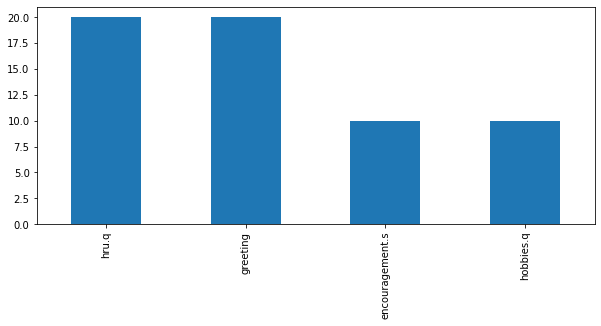

In [42]:
plt.figure(figsize=(10,4))
combined_df.intent.value_counts().plot(kind='bar');

In [56]:
from datetime import datetime

In [57]:
datetime_obj = datetime.now()
timestamp_str = datetime_obj.strftime('%d-%b-%Y(%H-%M-%S)')

In [58]:
combined_df.to_csv('data/augmented_data/augmented_intents_' + timestamp_str +'.csv', index=False)